U.S Patent Phrase Matching is a text similarity task. 

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

Import Data

In [2]:
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raghavib","key":"633596d81a7b5d6d24f42008bfd1a509"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle competitions download -c us-patent-phrase-to-phrase-matching

100% 682k/682k [00:00<00:00, 1.54MB/s]
100% 682k/682k [00:00<00:00, 1.54MB/s]


In [7]:
!unzip us-patent-phrase-to-phrase-matching.zip

Archive:  us-patent-phrase-to-phrase-matching.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
data= pd.read_csv('/content/train.csv')

In [9]:
data.head(5)

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [10]:
data.describe(include='object')

,id,anchor,target,context
count,36473,36473,36473,36473
unique,36473,733,29340,106
top,37d61fd2272659b1,component composite coating,composition,H01
freq,1,152,24,2186


The data is already cleaned, so we don't have to clean the data

Data Analysis

Missing Values

In [11]:
print(data.isnull().sum())

id         0
anchor     0
target     0
context    0
score      0
dtype: int64


Unique Anchors and 3 M's of Score

In [12]:
print('Total Number of Examples in the dataset: {}'.format(len(data)))

unique_anchors_count = data['anchor'].nunique()
print('Number of Unique Anchors: {}'.format(unique_anchors_count))

print('Mean of overrall Scores: {}'.format(data['score'].mean()))

print('Mode of overrall Scores: {}'.format(data['score'].mode()))

print('Median of overrall Scores: {}'.format(data['score'].median()))

unique_anchors = data['anchor'].unique()
print('Unique Anchors List: \n {} '.format(unique_anchors[:100]))

Total Number of Examples in the dataset: 36473
Number of Unique Anchors: 733
Mean of overrall Scores: 0.36206234748992405
Mode of overrall Scores: 0    0.5
dtype: float64
Median of overrall Scores: 0.25
Unique Anchors List: 
 ['abatement' 'abnormal position' 'absorbent properties' 'acan'
 'accept information' 'achieve authentication' 'acid absorption' 'ack'
 'acoustooptic modulator' 'acrylate groups' 'activating position'
 'acylate with acids' 'adapt for learning' 'adaptive linear'
 'adhesive mounting' 'adjacent laterally' 'adjust gas flow'
 'adjustable multiple' 'aesthetic effects' 'agitate means' 'air flow line'
 'air vent openings' 'align with input shaft' 'alpha gypsum' 'alphatic'
 'aluminium compounds' 'alumino silicates' 'ammonia recovery'
 'androgen receptor modulators' 'angular contact bearing' 'animal fats'
 'annular ends' 'annular neck' 'antiatherosclerotic' 'antidiuretic'
 'antigen composition' 'apart elongated' 'application messaging'
 'apply on tube' 'apply to anode electr

Distribution of traget column

unique count of score to check the distribution of classes: 
0.50    12300
0.25    11519
0.00     7471
0.75     4029
1.00     1154
Name: score, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7801a99f90>]],
      dtype=object)

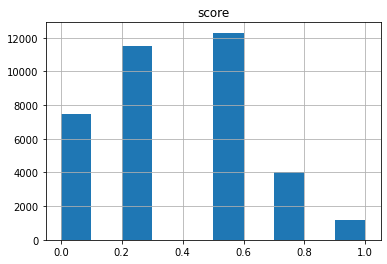

In [13]:
unqiue_count_per_score = data['score'].value_counts()
print('unique count of score to check the distribution of classes: \n{}'.format(unqiue_count_per_score))
data.hist(column='score')

In [14]:
fig = px.pie(data, values=data['score'].value_counts().values, names=data['score'].value_counts().index, title='Distribution of Score')
fig.show()

**Anchor Column**

In [15]:
print(f"Number of uniques values in ANCHOR column: {data.anchor.nunique()}")

Number of uniques values in ANCHOR column: 733


TOP 20 anchors values


In [16]:
data.anchor.value_counts().head(20)

component composite coating         152
sheet supply roller                 150
source voltage                      140
perfluoroalkyl group                136
el display                          135
average pore size                   133
speed control means                 130
parallel orientation                127
displacement mechanism              124
cathode layer                       118
flow openings                       117
electromagnetic radiation source    115
overall weight                      114
central flow path                   111
elastic assembly                    109
dimensional location                109
hydrocarbyl substituted succinic    108
conductor particles                 108
oxidizing enzyme                    107
stabilizer members                  107
Name: anchor, dtype: int64

Word Cloud to see most used words

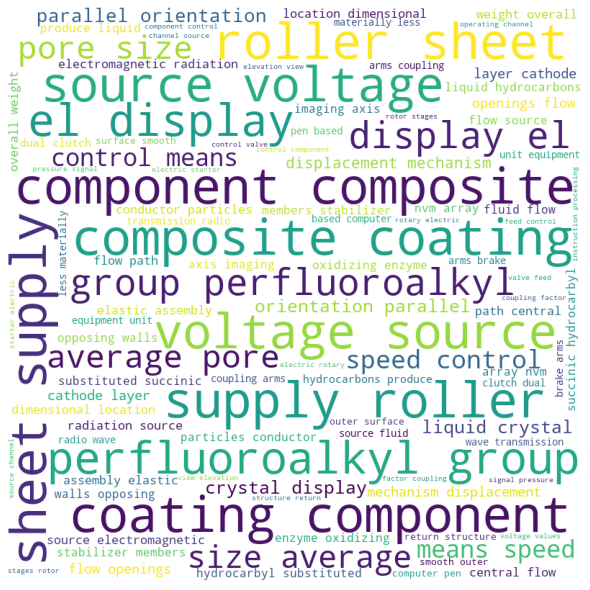

In [17]:
anchor_desc = data.anchor.values
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords,).generate(' '.join(anchor_desc)) 
                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Minium and Maximum Length of Anchor and Target.

In [18]:
data['anchor_len'] = data['anchor'].str.split().str.len()

print(f"The maximum length of ancor text is: {max(data.anchor_len)}")
print(f"Anchors with maximum lenght of 5: \n{data.query('anchor_len == 5')['anchor'].unique()}")
print(f"\nAnchors with maximum lenght of 4: \n{data.query('anchor_len == 4')['anchor'].unique()}")

The maximum length of ancor text is: 5
Anchors with maximum lenght of 5: 
['make of high density polyethylene'
 'produce by recombinant dna technology'
 'reflection type liquid crystal display'
 'rotate on its longitudinal axis']

Anchors with maximum lenght of 4: 
['align with input shaft' 'apply to anode electrode'
 'average power ratio reduction' 'coat with conducting layer'
 'combine with optical elements' 'connect to common conductor'
 'connect to electrode structure' 'consist of oxalic acid'
 'disk type recording medium' 'disperse in plastic material'
 'dissolve in solvent system' 'engage in guide slot'
 'extend from groove bottom' 'fall to low value'
 'high gradient magnetic separators' 'operate internal combustion engine'
 'peripheral nervous system stimulation' 'pulse width modulated control'
 'recover from reaction product' 'reflect by reflection mirror'
 'remain below threshold value' 'send to control node'
 'show in chemical formula' 'transparent liquid crystal display'
 'u

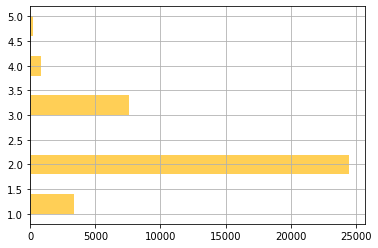

In [19]:
data.anchor_len.hist(orientation='horizontal', color='#FFCF56')

**Target Column**

In [20]:
print(f"Number of uniques values in TARGET column: {data.target.nunique()}")

Number of uniques values in TARGET column: 29340


In [21]:
data.target.value_counts().head(20)

composition     24
data            22
metal           22
motor           22
assembly        21
substrate       20
component       19
transmission    19
output          19
pressure        19
circuit         19
control         18
spring          18
opening         18
actuator        18
shaft           17
signal          16
container       16
compound        16
water           16
Name: target, dtype: int64

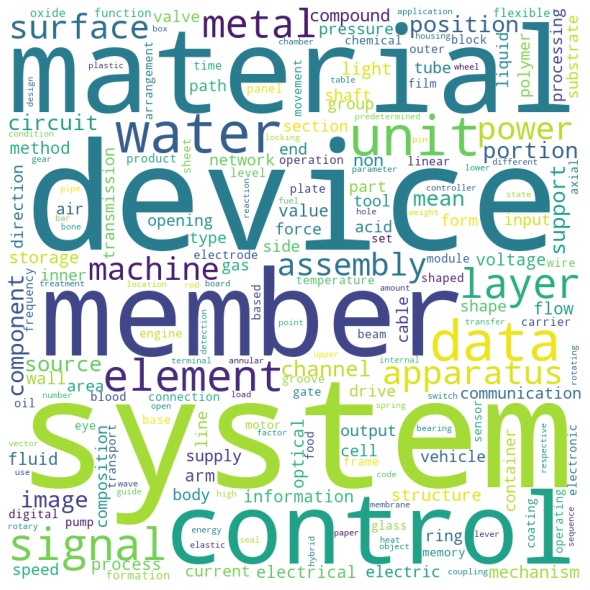

In [22]:
target_desc = data.target.values
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords,).generate(' '.join(target_desc)) 
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [23]:
data['target_len'] = data['target'].str.split().str.len()
data.target_len.value_counts()

2     19099
3      8503
1      6872
4      1606
5       272
6        76
7        26
8         7
10        3
9         3
13        2
12        2
15        1
11        1
Name: target_len, dtype: int64

In [24]:
print(f"Targets with maximum lenght of 11: \n{data.query('target_len == 11')['target'].unique()}")
print(f"\nTargets with lenght of 10: \n{data.query('target_len == 10')['target'].unique()}")
print(f"\nTargets with lenght of 9: \n{data.query('target_len == 9')['target'].unique()}")
print(f"\nTargets with lenght of 8: \n{data.query('target_len == 8')['target'].unique()}")

Targets with maximum lenght of 11: 
['n 9 fluorenylmethyloxycarbonyl 3 amino 3 45 dimethoxy 2 nitrophenylpropionic acid']

Targets with lenght of 10: 
['a substance used as a reagent in a rocket engine'
 'heating calcium oxide and aluminium oxide together at high temperatures'
 'a quadric surface that has exactly one axis of symmetry']

Targets with lenght of 9: 
['testing the life of a leakage current protection device'
 'a quadric surface that has no center of symmetry'
 'machine that converts the kinetic energy of a fluid']

Targets with lenght of 8: 
['loading sequence of a breech loading naval gun'
 'loading sequence of a breech loading small arm'
 'gearbox has two clutches but no clutch pedal'
 'partial displacement of a bone from its joint'
 'inflatable curtain module for use in a vehicle'
 'conveyors are used to convey larger sized items'
 'ability of an article to withstand prolonged wear']


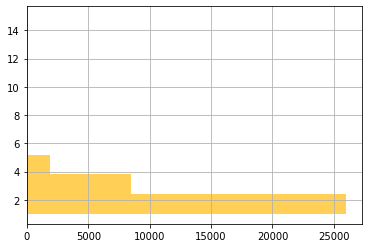

In [25]:
data.target_len.hist(orientation='horizontal', color='#FFCF56')

Model Building

In [26]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 14.6 MB/s 
     |████████████████████████████████| 7.6 MB 54.2 MB/s 
     |████████████████████████████████| 182 kB 64.0 MB/s 


In [27]:
from transformers import DebertaTokenizer, DebertaModel
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer

In [28]:
model_name = "microsoft/deberta-base"
max_len = 40
NUM_EPOCHS = 10
batch_size=8
LR = 1e-5

In [29]:
title = pd.read_csv("/content/titles.csv")

Merging the dataset with train data at hand.

In [30]:
train = pd.merge(data, title[["code","title"]], 
                 left_on = "context", right_on = "code",
                 how='left')

In [31]:
train.head(2)

,id,anchor,target,context,score,anchor_len,target_len,code,title
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,1,3,A47,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,1,3,A47,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...


Performing data pre-processing on the dataset

We will drop the context column and perform text pre-processing on the anchor and target columns.

In [32]:
train = train.drop(["context"],axis=1)
train['anchor'] = train['anchor'].str.lower()
train['target'] = train['target'].str.lower()
train['anchor'] = train['anchor'].str.replace('[^\w\s]','',regex=True)
train['target'] = train['target'].str.replace('[^\w\s]','',regex=True)
train["title"] = train["title"].apply(lambda x:re.sub('[;,]', ' ', x))

In [33]:
train.head(2)

,id,anchor,target,score,anchor_len,target_len,code,title
0,37d61fd2272659b1,abatement,abatement of pollution,0.50,1,3,A47,FURNITURE DOMESTIC ARTICLES OR APPLIANCES CO...
1,7b9652b17b68b7a4,abatement,act of abating,0.75,1,3,A47,FURNITURE DOMESTIC ARTICLES OR APPLIANCES CO...


K-Fold Cross Validation

In [34]:
from sklearn import model_selection

def create_kfold_dataset(dataset, num_splits):
    dataset["kfold"] = -1
    dataset = dataset.sample(frac=1).reset_index(drop=True)    
    num_bins = int(np.floor(1 + np.log2(len(dataset))))    
    dataset.loc[:, "bins"] = pd.cut(dataset["score"], bins=num_bins, labels=False)    
    kf = model_selection.StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)    
    for f, (t_, v_) in enumerate(kf.split(X=dataset, y=dataset.bins.values)):
        dataset.loc[v_, 'kfold'] = f    
    dataset = dataset.drop("bins", axis=1)
    return dataset.copy()

In [35]:
train = create_kfold_dataset(train.copy(), num_splits=5)

In [36]:
train.kfold.value_counts()

1    7295
0    7295
2    7295
3    7294
4    7294
Name: kfold, dtype: int64

Tokenization of texts

In [37]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/474 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [38]:
tokenizer

PreTrainedTokenizerFast(name_or_path='microsoft/deberta-base', vocab_size=50265, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=True), 'cls_token': AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=True), 'mask_token': AddedToken("[MASK]", rstrip=False, lstrip=True, single_word=False, normalized=True)})

Creating Phrase dataset for the model training.

In [39]:
def create_data(id_, anchor, target, code, title, score, tokenizer, max_len, train_status=True):
    input_ids = []
    attention_mask = []
    token_type_ids = []
    labels = []
    ids = []
    encoded_sent = tokenizer.batch_encode_plus([(k[0] + " " + k[2], k[1]) for k in zip(anchor,target,title)],max_length = max_len,padding = "max_length", truncation = True)
    for i in range(len(anchor)): 
        ids.append(id_[i])
        input_ids.append(encoded_sent['input_ids'][i])
        attention_mask.append(encoded_sent['attention_mask'][i])
        if train_status:
            labels.append(score[i])
    return {"input_ids":input_ids,
            "attention_mask":attention_mask,
            "ids":ids, 
            }, labels

Model Creation

In [40]:
def build_model(model_name, MAX_LEN):
  input__ids = tf.keras.Input(shape=(MAX_LEN, ), dtype = tf.int32)
  input__mask = tf.keras.Input(shape=(MAX_LEN, ), dtype = tf.int32)

  transformer = TFAutoModel.from_pretrained(model_name, trainable=True)
  x = transformer(input_ids = input__ids, attention_mask = input__mask)
  x = tf.keras.layers.GlobalAveragePooling1D()(x.last_hidden_state)
  x = tf.keras.layers.Dropout(0.3)(x)

  fnl = tf.keras.layers.Dense(1)(x)

  model = tf.keras.Model(inputs = [input__ids, input__mask], 
                        outputs = fnl)
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=LR), loss = "mse")
  return model

Creating validation and training set.

In [41]:
fld = 0

train_data, train_labels = create_data(train[train.kfold != fld]['id'].tolist(), 
                                       train[train.kfold != fld]['anchor'].tolist(), 
                                       train[train.kfold != fld]['target'].tolist(),
                                       train[train.kfold != fld]['code'].tolist(),
                                       train[train.kfold != fld]['title'].tolist(), 
                                       train[train.kfold != fld]['score'].tolist(), 
                                       tokenizer, max_len, train_status=True)

val_data, val_labels = create_data(train[train.kfold == fld]['id'].tolist(), 
                                       train[train.kfold == fld]['anchor'].tolist(), 
                                       train[train.kfold == fld]['target'].tolist(),
                                       train[train.kfold == fld]['code'].tolist(),
                                       train[train.kfold == fld]['title'].tolist(), 
                                       train[train.kfold == fld]['score'].tolist(), 
                                       tokenizer, max_len, train_status=True)

Calling the model and summarising it.

In [42]:
model = build_model(model_name, max_len)

Downloading:   0%|          | 0.00/555M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDebertaModel.

All the layers of TFDebertaModel were initialized from the model checkpoint at microsoft/deberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDebertaModel for predictions without further training.


In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 tf_deberta_model (TFDebertaMod  TFBaseModelOutput(l  138601728  ['input_1[0][0]',                
 el)                            ast_hidden_state=(N               'input_2[0][0]']                
                                one, 40, 768),                                                    
                                 hidden_states=None                                           

Final Step - Run the model and get the predicted value.

In [44]:
val_data_ = ((np.asarray(val_data['input_ids']),
              np.asarray(val_data['attention_mask']),
             ),
             np.asarray(val_labels).ravel())

In [45]:
model.fit((np.asarray(train_data['input_ids']),
           np.asarray(train_data['attention_mask']),
          ),np.asarray(train_labels).ravel(), 
        epochs = NUM_EPOCHS,shuffle=True,batch_size = batch_size,validation_data= val_data_)

Epoch 1/10


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


3648/3648 [==============================] - 730s 190ms/step - loss: 0.1718 - val_loss: 0.0665
Epoch 2/10
3648/3648 [==============================] - 797s 218ms/step - loss: 0.0727 - val_loss: 0.0416
Epoch 3/10
3648/3648 [==============================] - 664s 182ms/step - loss: 0.0489 - val_loss: 0.0343
Epoch 4/10
3648/3648 [==============================] - 661s 181ms/step - loss: 0.0368 - val_loss: 0.0290
Epoch 5/10
3648/3648 [==============================] - 660s 181ms/step - loss: 0.0286 - val_loss: 0.0335
Epoch 6/10
3648/3648 [==============================] - 659s 181ms/step - loss: 0.0230 - val_loss: 0.0307
Epoch 7/10
3648/3648 [==============================] - 658s 180ms/step - loss: 0.0189 - val_loss: 0.0249
Epoch 8/10
3648/3648 [==============================] - 658s 180ms/step - loss: 0.0159 - val_loss: 0.0272
Epoch 9/10
3648/3648 [==============================] - 657s 180ms/step - loss: 0.0137 - val_loss: 0.0327
Epoch 10/10
3648/3648 [==============================] - 

In [ ]:
model.save('my_model')

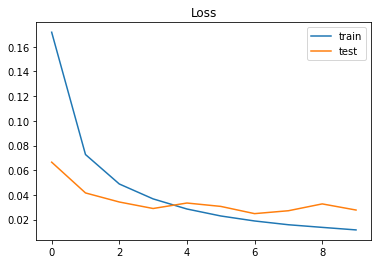

In [46]:
history = model.history

import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

We can see that both the train and test loss are converging. 

Predicted VS Actual.

We will get 20 datapoints from our data and predict output for those.

In [47]:
test_data = train[:20]
actual_value = test_data.score.values

In [48]:
test_data, test_labels = create_data(test_data['id'].tolist(),test_data['anchor'].tolist(),
                                   test_data['target'].tolist(),
                                   test_data['code'].tolist(),
                                   test_data['title'].tolist(),
                                   None, tokenizer, max_len,
                                   train_status=False)

In [49]:
test_preds = model.predict((np.asarray(test_data['input_ids']),
                            np.asarray(test_data['attention_mask'])
                           ))

1/1 [==============================] - 6s 6s/step


In [50]:
submission = pd.DataFrame(test_preds,columns=['score'])
submission['score'] = submission.score.apply(lambda x: 0 if x < 0 else x)
submission['score'] = submission.score.apply(lambda x: 1 if x > 1 else x)

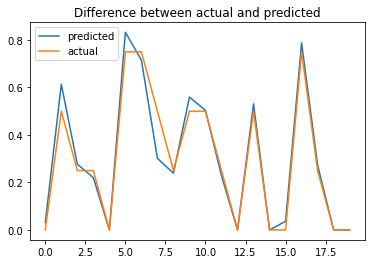

In [51]:
plt.title('Difference between actual and predicted')
plt.plot(submission.score.values, label='predicted')
plt.plot(actual_value, label='actual')
plt.legend()
plt.show()

From the closeness of the graph, we can see that they almost overlap. Which shows that the predicted and actual values don't differ much.

Final pipeline function.

For function1 we don't need the target column, so we will give the input data without target column.

In [72]:
def final_function1(data):
  train = pd.merge(data, title[["code","title"]], left_on = "context", right_on = "code", how='left')
  train = train.drop(["context"],axis=1)
  train['anchor'] = train['anchor'].str.lower()
  train['target'] = train['target'].str.lower()
  train['anchor'] = train['anchor'].str.replace('[^\w\s]','',regex=True)
  train['target'] = train['target'].str.replace('[^\w\s]','',regex=True)
  train["title"] = train["title"].apply(lambda x:re.sub('[;,]', ' ', x))
  train_data, train_labels = create_data(train['id'].tolist(),train['anchor'].tolist(),train['target'].tolist(),train['code'].tolist(),train['title'].tolist(),None, tokenizer, max_len,train_status=False)                                 
  train_preds = model.predict((np.asarray(train_data['input_ids']),np.asarray(train_data['attention_mask'])))
  submission = pd.DataFrame(train_preds,columns=['score'])
  submission['score'] = submission.score.apply(lambda x: 0 if x < 0 else x)
  submission['score'] = submission.score.apply(lambda x: 1 if x > 1 else x)
  return submission.score.values

In [73]:
data = pd.read_csv('/content/test.csv')
output_1 = final_function1(data)

2/2 [==============================] - 0s 76ms/step


In [74]:
output_1

array([0.49725246, 0.52572006, 0.44897556, 0.23933692, 0.        ,
       0.54215288, 0.49979362, 0.00657707, 0.23648553, 1.        ,
       0.53022385, 0.23431647, 0.94724798, 0.94058323, 0.76239073,
       0.39252689, 0.14668114, 0.0673315 , 0.60658658, 0.2242233 ,
       0.26647866, 0.23738742, 0.09357641, 0.2511149 , 0.55579525,
       0.        , 0.        , 0.        , 0.00115822, 0.98578745,
       0.5185858 , 0.01729663, 0.78102142, 0.56447119, 0.25539166,
       0.2206863 ])

For the first function, we pass in our raw test dataset as input and get the output as predicted datapoints.

In [80]:
def final_function2(data):
  train = pd.merge(data, title[["code","title"]], left_on = "context", right_on = "code", how='left')
  train = train.drop(["context"],axis=1)
  train['anchor'] = train['anchor'].str.lower()
  train['target'] = train['target'].str.lower()
  train['anchor'] = train['anchor'].str.replace('[^\w\s]','',regex=True)
  train['target'] = train['target'].str.replace('[^\w\s]','',regex=True)
  train["title"] = train["title"].apply(lambda x:re.sub('[;,]', ' ', x))
  actual_value   = train.score.values
  train_data, train_labels = create_data(train['id'].tolist(),train['anchor'].tolist(),train['target'].tolist(),train['code'].tolist(),train['title'].tolist(),None, tokenizer, max_len,train_status=False)                                 
  train_preds = model.predict((np.asarray(train_data['input_ids']),np.asarray(train_data['attention_mask'])))
  submission = pd.DataFrame(train_preds,columns=['score'])
  submission['score'] = submission.score.apply(lambda x: 0 if x < 0 else x)
  submission['score'] = submission.score.apply(lambda x: 1 if x > 1 else x)
  predicted_value = submission.score.values
  mse = sum((actual_value-predicted_value)**2)/train.shape[0]
  return mse,predicted_value,actual_value

In [81]:
data = pd.read_csv('/content/train.csv')
output_2,predicted_value,actual_value = final_function2(data)

1140/1140 [==============================] - 116s 102ms/step


In [82]:
output_2

0.011847954812365044

For the final function2 instead of using test .csv, we're using train again, we this is a kaggle dataset for a live hosted competition and we don't have the "score" (target) column for the test data to get the metric value. This is also the reason for very low mse, where the model looks like over traning, it's not. It's just that we don't have anyother data to give as input so we gave the train data itself. 